# Mobile Apps Analysis 
<hr style="margin-bottom: 10px;">

### Analysis and visualization of information from 7200 apps from the Apple iOS app store
<i>Using data from user Ramanathan on Kaggle:</i>
https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps

<img src="http://www.drateetsharma.com/wp-content/uploads/2017/10/google-play-and-apple-app-store-logos-two-up.jpg" style="width:400px; float: center;"></img>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize': (18, 6)})

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


### Loading the data

In [2]:
df = pd.read_csv('data/AppleStore.csv')
df.head(10)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
5,6,283619399,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,1
6,7,283646709,PayPal - Send and request money safely,227795968,USD,0.00,119487,879,4.0,4.5,6.12.0,4+,Finance,37,0,19,1
7,8,284035177,Pandora - Music & Radio,130242560,USD,0.00,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1
8,9,284666222,PCalc - The Best Calculator,49250304,USD,9.99,1117,4,4.5,5.0,3.6.6,4+,Utilities,37,5,1,1
9,10,284736660,Ms. PAC-MAN,70023168,USD,3.99,7885,40,4.0,4.0,4.0.4,4+,Games,38,0,10,1


### Checking for null

In [7]:
df.isnull().sum()

id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

### Removing unwanted columns

In [8]:
df.keys()

Index(['id', 'track_name', 'size_bytes', 'currency', 'price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'],
      dtype='object')

In [5]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [6]:
df.shape

(7197, 16)

### Ratings

In [19]:
#List of all possible ratings

df['user_rating'].unique()

array([4. , 3.5, 4.5, 5. , 3. , 2. , 2.5, 0. , 1.5, 1. ])

In [74]:
df['user_rating'].value_counts()

4.5    2663
4.0    1626
0.0     929
3.5     702
5.0     492
3.0     383
2.5     196
2.0     106
1.5      56
1.0      44
Name: user_rating, dtype: int64

In [5]:
#Average rating

df['user_rating'].mean()

3.526955675976101

##### Top rated games

In [48]:
#Top rated games
mask = df['user_rating'] == 5.0
top_rated_games = df[mask]
top_rated_games.describe()

,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,4.920000e+02,4.920000e+02,492.000000,492.000000,492.000000,492.0,492.000000,492.000000,492.000000,492.000000,492.000000
mean,9.249921e+08,1.574089e+08,1.645589,12699.829268,974.873984,5.0,4.378049,37.617886,3.713415,4.674797,0.993902
std,2.366487e+08,2.587958e+08,2.866857,49216.289091,8416.104399,0.0,1.489052,3.441736,1.980861,7.372261,0.077928
min,2.859942e+08,9.093120e+05,0.000000,1.000000,0.000000,5.0,0.000000,13.000000,0.000000,0.000000,0.000000
25%,7.906462e+08,4.874522e+07,0.000000,11.000000,1.000000,5.0,4.500000,37.000000,3.000000,1.000000,1.000000
50%,1.025045e+09,9.040998e+07,0.000000,253.500000,22.000000,5.0,5.000000,38.000000,5.000000,1.000000,1.000000
75%,1.095574e+09,1.615982e+08,1.990000,3900.750000,182.250000,5.0,5.000000,38.000000,5.000000,5.000000,1.000000
max,1.188376e+09,2.779450e+09,29.990000,481564.000000,177050.000000,5.0,5.000000,47.000000,5.000000,75.000000,1.000000


In [55]:
top_rated_games['id'].count()

492

In [66]:
avg_top_game_price = top_rated_games['price'].mean()

print('$$$ Average price of games with a 5.0 user rating: ${:.2f} $$$'.format(avg_top_game_price))

$$$ Average price of games with a 5.0 user rating: $1.65 $$$


(array([315.,  55.,  42.,  21.,  31.,   8.,   3.,   4.,   2.,   7.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.        ,  0.99966667,  1.99933333,  2.999     ,  3.99866667,
         4.99833333,  5.998     ,  6.99766667,  7.99733333,  8.997     ,
         9.99666667, 10.99633333, 11.996     , 12.99566667, 13.99533333,
        14.995     , 15.99466667, 16.99433333, 17.994     , 18.99366667,
        19.99333333, 20.993     , 21.99266667, 22.99233333, 23.992     ,
        24.99166667, 25.99133333, 26.991     , 27.99066667, 28.99033333,
        29.99      ]),
 <a list of 30 Patch objects>)

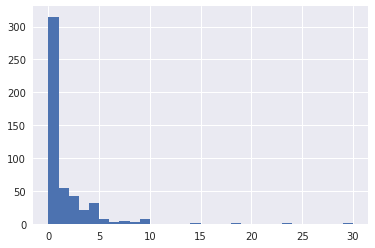

In [65]:
plt.hist(top_rated_games['price'], bins=30)

In [67]:
avg_top_game_languages = top_rated_games['lang.num'].mean()
print('*** Games with 5.0 user ratings support an average of {:.2f} langauges ***'.format(avg_top_game_languages))

*** Games with 5.0 user ratings support an average of 4.67 langauges ***


(array([323.,  32.,  28.,  22.,  46.,   7.,  13.,   1.,   4.,   1.,   1.,
          0.,  11.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ,
        27.5, 30. , 32.5, 35. , 37.5, 40. , 42.5, 45. , 47.5, 50. , 52.5,
        55. , 57.5, 60. , 62.5, 65. , 67.5, 70. , 72.5, 75. ]),
 <a list of 30 Patch objects>)

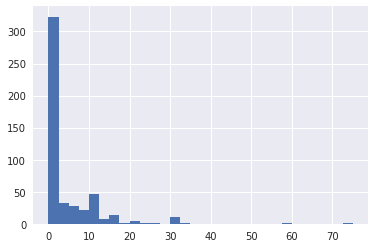

In [68]:
plt.hist(top_rated_games['lang.num'], bins=30)